In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split#for training and spliting the model and also testing
from sklearn.ensemble import RandomForestRegressor#for the model 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error#metrics to analyze the data
from sklearn.linear_model import LinearRegression#for the model

**IMPORTING THE LIBRARY**

In [2]:
df=pd.read_csv("\\Users\\adilm\\Downloads\\archive (39)\\Snitch_Fashion_Sales_Uncleaned.csv")

**FIRST 5 ROWS OF THE DATASET**

In [3]:
df.head(5)

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,NaN,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,NaN,0.00,02-01-2025,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,NaN,0.00,18-06-2025,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaN,hyderbad,NaN,63.66


In [4]:
df.shape# SHAPE OF THE DATASET

(2500, 12)

In [5]:
df.info() #CHECKING THE DATATYPES OF THE COLUMNS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Customer_Name     2500 non-null   object 
 2   Product_Category  2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Units_Sold        1194 non-null   float64
 5   Unit_Price        1290 non-null   float64
 6   Discount_%        849 non-null    float64
 7   Sales_Amount      2500 non-null   float64
 8   Order_Date        1894 non-null   object 
 9   City              2500 non-null   object 
 10  Segment           1679 non-null   object 
 11  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 234.5+ KB


In [6]:
df['Date_Time'] = pd.to_datetime(df['Order_Date'], format='mixed', errors='coerce') #CONVERTING THE IT INTO DATE


In [7]:
df.isna().sum()#CHECKING IF ANY DUPLICATES THERE OR NOT

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold          1306
Unit_Price          1210
Discount_%          1651
Sales_Amount           0
Order_Date           606
City                   0
Segment              821
Profit                 0
Date_Time            606
dtype: int64

In [8]:
df['Units_Sold'] = df['Units_Sold'].fillna(df['Units_Sold'].median())
df['Unit_Price'] = df['Unit_Price'].fillna(df['Unit_Price'].median())
df['Discount_%'] = df['Discount_%'].fillna(df['Discount_%'].median())

In [9]:
df.isna().sum()

Order_ID              0
Customer_Name         0
Product_Category      0
Product_Name          0
Units_Sold            0
Unit_Price            0
Discount_%            0
Sales_Amount          0
Order_Date          606
City                  0
Segment             821
Profit                0
Date_Time           606
dtype: int64

In [10]:
df['Segment']=df['Segment'].fillna('unknown')

In [11]:
df['Date_Time']=df['Date_Time'].fillna(df['Date_Time'].median())

In [12]:
df.isna().sum()

Order_ID              0
Customer_Name         0
Product_Category      0
Product_Name          0
Units_Sold            0
Unit_Price            0
Discount_%            0
Sales_Amount          0
Order_Date          606
City                  0
Segment               0
Profit                0
Date_Time             0
dtype: int64

In [13]:
df1=df.drop("Order_Date",axis=1)

In [14]:
df1.head(2)

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,City,Segment,Profit,Date_Time
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,2.0,842.000,0.60,0.0,Delhi,B2C,2137.45,2025-02-27
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,2685.985,0.65,0.0,Ahmedabad,unknown,1588.15,2025-07-15


In [15]:
df2=df1.drop("Customer_Name",axis=1)

In [16]:
df2["total sales"]=df2['Units_Sold']*df2['Unit_Price']

In [17]:
df2.duplicated().sum()
#we dont have any duplicate values

0

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          2500 non-null   int64         
 1   Product_Category  2500 non-null   object        
 2   Product_Name      2500 non-null   object        
 3   Units_Sold        2500 non-null   float64       
 4   Unit_Price        2500 non-null   float64       
 5   Discount_%        2500 non-null   float64       
 6   Sales_Amount      2500 non-null   float64       
 7   City              2500 non-null   object        
 8   Segment           2500 non-null   object        
 9   Profit            2500 non-null   float64       
 10  Date_Time         2500 non-null   datetime64[ns]
 11  total sales       2500 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 234.5+ KB


In [19]:
df2.describe()

,Order_ID,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Profit,Date_Time,total sales
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500,2500.000000
mean,2193.060000,1.971600,2688.941952,0.648800,126.756252,981.569032,2024-11-29 10:18:37.440000,5282.004342
min,1000.000000,-2.000000,400.210000,0.000000,-7518.330000,-992.610000,2023-07-23 00:00:00,-9898.340000
25%,1543.750000,2.000000,2627.007500,0.650000,0.000000,-19.670000,2024-09-26 18:00:00,2685.985000
50%,2182.500000,2.000000,2685.985000,0.650000,0.000000,947.885000,2024-12-21 00:00:00,5371.970000
75%,2842.250000,2.000000,2739.635000,0.650000,0.000000,1993.515000,2025-03-07 00:00:00,7527.595000
max,3499.000000,6.000000,4998.910000,1.300000,29180.680000,2997.110000,2025-12-07 00:00:00,29907.900000
std,748.063846,1.814417,948.346253,0.221559,1464.944525,1159.159244,NaN,5516.808294


In [20]:
'''
we have profit negative term which we should remove 
we should remove unit solds negative
'''

'\nwe have profit negative term which we should remove \nwe should remove unit solds negative\n'

In [21]:
df2['Profit']=df2['Profit'].astype(str)
df2['Units_Sold']=df2['Units_Sold'].astype(str)

In [22]:
df2['Profit']=df2['Profit'].str.replace("-","",regex=False)
df2['Units_Sold']=df2['Units_Sold'].str.replace("-","",regex=False)

In [23]:
df2['Profit']=df2['Profit'].astype(float).astype(int)
df2['Units_Sold']=df2['Units_Sold'].astype(float).astype(int)

In [24]:
# Convert to datetime, invalid entries become NaT
df2['Date_Time'] = pd.to_datetime(df2['Date_Time'], errors='coerce')

# Replace NaT with 'Unknown'
df2['Date_Time'] = df2['Date_Time'].fillna("Unknown")

In [25]:
df2.describe()

,Order_ID,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Profit,Date_Time,total sales
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500,2500.000000
mean,2193.060000,2.313200,2688.941952,0.648800,126.756252,1240.520000,2024-11-29 10:18:37.440000,5282.004342
min,1000.000000,0.000000,400.210000,0.000000,-7518.330000,0.000000,2023-07-23 00:00:00,-9898.340000
25%,1543.750000,2.000000,2627.007500,0.650000,0.000000,520.750000,2024-09-26 18:00:00,2685.985000
50%,2182.500000,2.000000,2685.985000,0.650000,0.000000,970.500000,2024-12-21 00:00:00,5371.970000
75%,2842.250000,2.000000,2739.635000,0.650000,0.000000,1992.750000,2025-03-07 00:00:00,7527.595000
max,3499.000000,6.000000,4998.910000,1.300000,29180.680000,2997.000000,2025-12-07 00:00:00,29907.900000
std,748.063846,1.351975,948.346253,0.221559,1464.944525,875.668425,NaN,5516.808294


In [26]:
df2.head()

,Order_ID,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,City,Segment,Profit,Date_Time,total sales
0,1000,Jeans,Slim Fit Jeans,2,842.000,0.60,0.00,Delhi,B2C,2137,2025-02-27,1684.000
1,1001,Jeans,Slim Fit Jeans,1,2685.985,0.65,0.00,Ahmedabad,unknown,1588,2025-07-15,2685.985
2,1002,Jackets,Puffer Coat,1,637.820,0.65,0.00,Mumbai,B2B,158,2025-02-01,637.820
3,1003,Shoes,Loafers,2,2962.270,0.65,0.00,bengaluru,B2B,2296,2025-06-18,5924.540
4,1004,Accessories,Belts,1,2881.070,0.27,2103.18,hyderbad,unknown,63,2024-12-21,2881.070


In [27]:
df2.drop(df2[df2['Profit'] > df2['total sales']].index, inplace=True)

In [28]:
df2.drop(df2[df2['Profit'] <400].index, inplace=True)

In [29]:
df2['City'].unique()

array(['Ahmedabad', 'bengaluru', 'Mumbai', 'Bangalore', 'Pune', 'Hyd',
       'Hyderabad', 'hyderbad', 'Delhi'], dtype=object)

In [30]:
df2['Product_Category'].unique()

array(['Jeans', 'Shoes', 'T-Shirts', 'Dresses', 'Accessories', 'Jackets'],
      dtype=object)

In [31]:
df2['City']=df2['City'].str.replace("hyderbad","Hyderabad",regex=False)

In [32]:
df2['City']=df2['City'].str.replace("Hyd","Hyderabad",regex=False)

In [33]:
df2['City']=df2['City'].str.replace("Banglore","bengaluru",regex=False)

In [34]:
df2['City']=df2['City'].str.replace("Bangalore","bengaluru",regex=False)

In [35]:
df2['Final_Saving']=(df2['total sales'] *(1-df2['Discount_%']))

In [36]:
df2.head(2)
#if the discound was given 65 percent 

,Order_ID,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,City,Segment,Profit,Date_Time,total sales,Final_Saving
1,1001,Jeans,Slim Fit Jeans,1,2685.985,0.65,0.0,Ahmedabad,unknown,1588,2025-07-15,2685.985,940.09475
3,1003,Shoes,Loafers,2,2962.270,0.65,0.0,bengaluru,B2B,2296,2025-06-18,5924.540,2073.58900


In [37]:
df3=df2.drop("Profit",axis=True)

In [38]:
df3.rename(columns={'total sales': 'actual_Price'}, inplace=True)
df3.rename(columns={'Final_Saving': 'Selling_Price'}, inplace=True)


In [39]:
# statistics

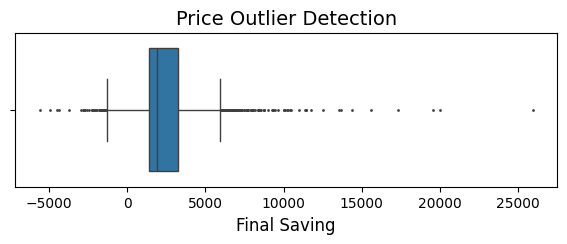

In [40]:
plt.figure(figsize=(7, 2))
sns.boxplot(data=df3, x='Selling_Price', fliersize=1)

plt.title("Price Outlier Detection", fontsize=14)  
plt.xlabel("Final Saving", fontsize=12)           
plt.ylabel("", fontsize=12)                        
plt.tick_params(axis='x', labelsize=10)             

plt.show()

In [41]:
Q1 = df3['Selling_Price'].quantile(0.25)   # First quartile
Q3 = df3['Selling_Price'].quantile(0.75)   # Third quartile
IQR = Q3 - Q1                             # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
df_no_outliers = df3[(df3['Selling_Price'] >= lower_bound) & (df3['Selling_Price'] <= upper_bound)]

print(f"Original rows: {len(df3)}, After removing outliers: {len(df_no_outliers)}")

Original rows: 1615, After removing outliers: 1478


In [42]:
h=df3['Selling_Price'].sum()
print(f"total in hand :{h}")

total in hand :4002391.40375


In [43]:
h=df3['Units_Sold'].sum()
print(f"the total units sold are :{h}")

the total units sold are :4219


In [44]:
h=df3['Product_Category'].mode()
print("the most famous product is  "+h)

0    the most famous product is  Dresses
Name: Product_Category, dtype: object


In [45]:
h=df3['Product_Name'].mode()
print("the most famous product name  is  "+h)

0    the most famous product name  is  Wrap Dress
Name: Product_Name, dtype: object


In [46]:
#graphs


In [47]:
df3.head(5)

,Order_ID,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,City,Segment,Date_Time,actual_Price,Selling_Price
1,1001,Jeans,Slim Fit Jeans,1,2685.985,0.65,0.0,Ahmedabad,unknown,2025-07-15,2685.985,940.09475
3,1003,Shoes,Loafers,2,2962.270,0.65,0.0,bengaluru,B2B,2025-06-18,5924.540,2073.58900
5,1005,T-Shirts,Crop Top,2,2685.985,0.65,0.0,Mumbai,B2B,2023-12-05,5371.970,1880.18950
7,1007,Dresses,Casual Midi,2,3669.560,0.65,0.0,bengaluru,B2C,2024-12-21,7339.120,2568.69200
8,1008,Accessories,Sunglasses,2,2685.985,0.65,0.0,Ahmedabad,B2C,2024-12-21,5371.970,1880.18950


In [48]:
'''
selling prics and date
top 10 productct actogery
top 10 product_name
unit sold year wise
top city wrt price
top order id
'''

'\nselling prics and date\ntop 10 productct actogery\ntop 10 product_name\nunit sold year wise\ntop city wrt price\ntop order id\n'

In [49]:
df3['Date_Time']=df3['Date_Time'].dt.year

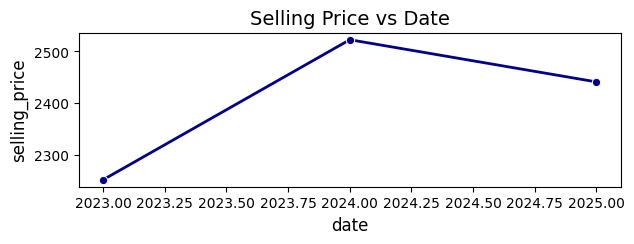

In [50]:
plt.figure(figsize=(7,2))
sns.lineplot(data=df3,x='Date_Time',y="Selling_Price",color='darkblue', linestyle='-', linewidth=2, marker='o', errorbar=None) 

plt.title("Selling Price vs Date",fontsize=14)
plt.xlabel("date",fontsize=12)
plt.ylabel("selling_price",fontsize=12)
plt.show()

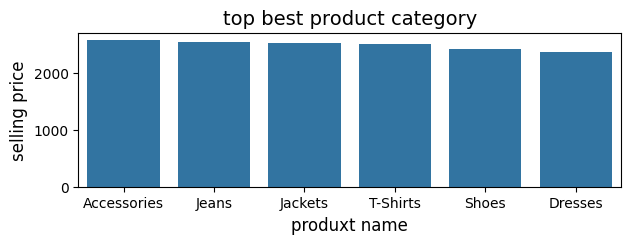

In [51]:
plt.figure(figsize=(7,2))
g=df3.groupby("Product_Category")["Selling_Price"].mean().sort_values(ascending =False).head(10)
g_df=g.reset_index()
sns.barplot(data=g_df,x="Product_Category",y="Selling_Price")
plt.xlabel("produxt name",fontsize=12)
plt.ylabel("selling price",fontsize=12)
plt.title("top best product category",fontsize=14)
plt.show()

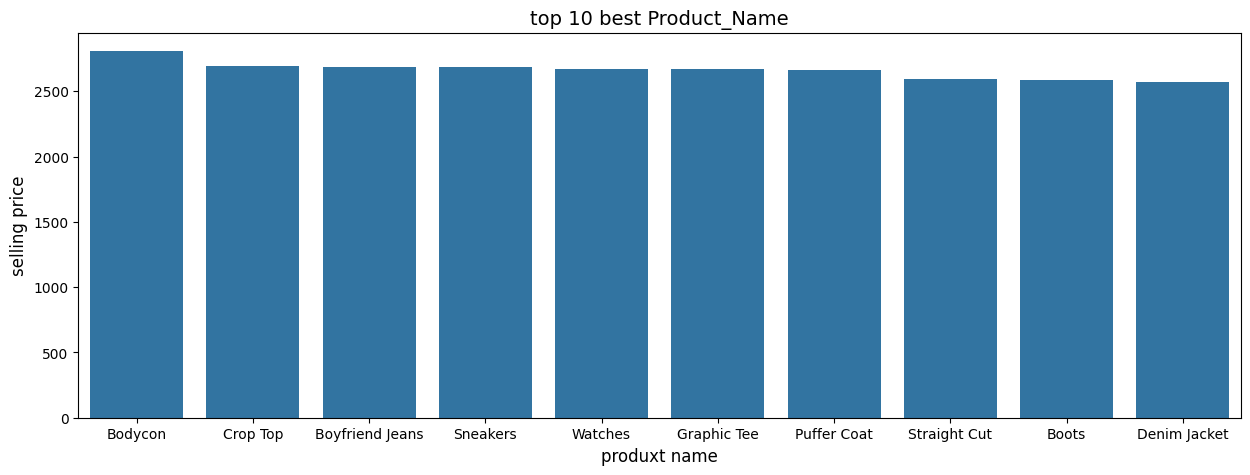

In [52]:
plt.figure(figsize=(15,5))
g=df3.groupby("Product_Name")["Selling_Price"].mean().sort_values(ascending =False).head(10)
g_df=g.reset_index()
sns.barplot(data=g_df,x="Product_Name",y="Selling_Price")
plt.xlabel("produxt name",fontsize=12)
plt.ylabel("selling price",fontsize=12)
plt.title("top 10 best Product_Name",fontsize=14)
plt.show()

C:\Users\adilm\AppData\Local\Temp\ipykernel_45392\2539947879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_units, x='Date_Time', y='Units_Sold',palette='viridis')


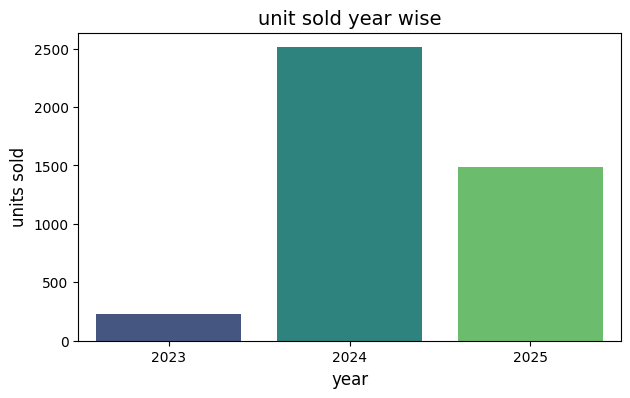

In [53]:
yearly_units = df3.groupby('Date_Time')['Units_Sold'].sum().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=yearly_units, x='Date_Time', y='Units_Sold',palette='viridis')
plt.title("unit sold year wise",fontsize=14)
plt.xlabel("year",fontsize=12)
plt.ylabel("units sold",fontsize=12)
plt.show()

In [54]:
df3['City']=df3['City'].str.replace("Hyderababd","Hyderabad",regex=False)

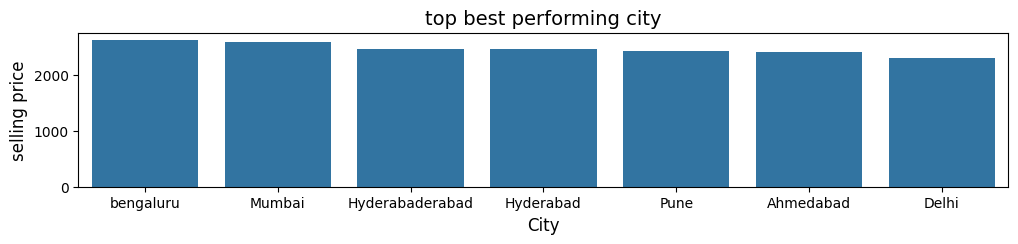

In [55]:
plt.figure(figsize=(12,2))
g=df3.groupby("City")["Selling_Price"].mean().sort_values(ascending =False).head(10)
g_df=g.reset_index()
sns.barplot(data=g_df,x="City",y="Selling_Price")
plt.xlabel("City",fontsize=12)
plt.ylabel("selling price",fontsize=12)
plt.title("top best performing city",fontsize=14)
plt.show()


In [56]:
#now a model 

In [57]:
df3.head(0)

,Order_ID,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,City,Segment,Date_Time,actual_Price,Selling_Price


In [58]:
df4=pd.get_dummies(df3,columns=['Product_Category','City'])

In [59]:
df4.head(1)

,Order_ID,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Segment,Date_Time,actual_Price,Selling_Price,...,Product_Category_Jeans,Product_Category_Shoes,Product_Category_T-Shirts,City_Ahmedabad,City_Delhi,City_Hyderabad,City_Hyderabaderabad,City_Mumbai,City_Pune,City_bengaluru
1,1001,Slim Fit Jeans,1,2685.985,0.65,0.0,unknown,2025,2685.985,940.09475,...,True,False,False,True,False,False,False,False,False,False


In [60]:
y=df4['Selling_Price']
x=df4.drop(columns=['Product_Name','Selling_Price','Sales_Amount','Segment','Date_Time'],axis=1)#we want to drop 'Sellin_Price','Sales_Amount','Segement','Date_Time'

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [63]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [64]:
prediction=model.predict(x_test)

In [65]:
rmse=np.sqrt(mean_squared_error(y_test,prediction))
print(f"rmse is is {rmse}")
mse=mean_squared_error(y_test,prediction)
print(f"mse is {mse}")
r2=r2_score(y_test,prediction)
print(f"the r 2 valuje is {r2}")

rmse is is 500.5759610225247
mse is 250576.2927536242
the r 2 valuje is 0.9541590331496564


In [72]:
# ===== Predict Selling Price Dynamically =====

import pandas as pd

# Ask user for inputs
units_sold = float(input("Enter Units Sold: "))
unit_price = float(input("Enter Unit Price: "))
discount = float(input("Enter Discount %: "))

# Category flags (1 or 0)
cat_accessories = int(input("Is Product Category Accessories? (1/0): "))
cat_dresses = int(input("Is Product Category Dresses? (1/0): "))
cat_jackets = int(input("Is Product Category Jackets? (1/0): "))
cat_jeans = int(input("Is Product Category Jeans? (1/0): "))
cat_shoes = int(input("Is Product Category Shoes? (1/0): "))
cat_tshirts = int(input("Is Product Category T-Shirts? (1/0): "))

# City flags (1 or 0)
city_ahmedabad = int(input("City Ahmedabad? (1/0): "))
city_delhi = int(input("City Delhi? (1/0): "))
city_hyderabad = int(input("City Hyderabad? (1/0): "))
city_mumbai = int(input("City Mumbai? (1/0): "))
city_pune = int(input("City Pune? (1/0): "))
city_bengaluru = int(input("City Bengaluru? (1/0): "))

# Create dataframe for prediction
input_data = pd.DataFrame([{
    'Units_Sold': units_sold,
    'Unit_Price': unit_price,
    'Discount_%': discount,
    'Product_Category_Accessories': cat_accessories,
    'Product_Category_Dresses': cat_dresses,
    'Product_Category_Jackets': cat_jackets,
    'Product_Category_Jeans': cat_jeans,
    'Product_Category_Shoes': cat_shoes,
    'Product_Category_T-Shirts': cat_tshirts,
    'City_Ahmedabad': city_ahmedabad,
    'City_Delhi': city_delhi,
    'City_Hyderabad': city_hyderabad,
    'City_Mumbai': city_mumbai,
    'City_Pune': city_pune,
    'City_bengaluru': city_bengaluru
}])

# Match training columns
input_data = pd.get_dummies(input_data, drop_first=True)
input_data = input_data.reindex(columns=x.columns, fill_value=0)

predicted_price = model.predict(input_data)
print(f"\nPredicted Selling Price: {predicted_price[0]:.2f}")


Enter Units Sold:  5
Enter Unit Price:  567
Enter Discount %:  0.3
Is Product Category Accessories? (1/0):  1
Is Product Category Dresses? (1/0):  0
Is Product Category Jackets? (1/0):  0
Is Product Category Jeans? (1/0):  0
Is Product Category Shoes? (1/0):  0
Is Product Category T-Shirts? (1/0):  0
City Ahmedabad? (1/0):  1
City Delhi? (1/0):  0
City Hyderabad? (1/0):  0
City Mumbai? (1/0):  0
City Pune? (1/0):  0
City Bengaluru? (1/0):  0



Predicted Selling Price: 966.28


In [ ]:
df3.head(1)